In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [13]:
# Load the datasets
temp_df = pd.read_csv('daily-min-temperatures.csv', parse_dates=[0])
sunspots_df = pd.read_csv('monthly-sunspots.csv', parse_dates=[0])

Temperature Dataset:
        Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB
None
              Temp
count  3650.000000
mean     11.177753
std       4.071837
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000


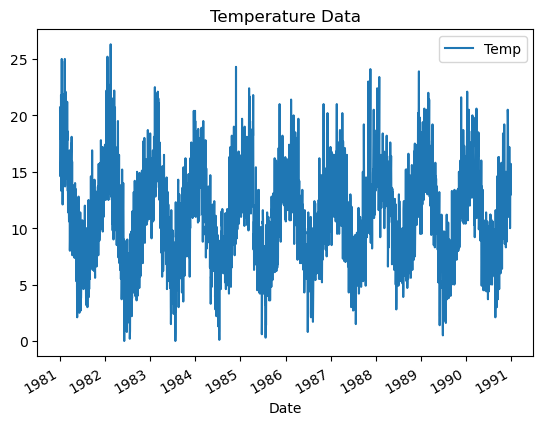

In [14]:
# Explore the temperature dataset
print("Temperature Dataset:")
print(temp_df.head())
print(temp_df.info())
print(temp_df.describe())
temp_df.plot(x='Date', y='Temp', title='Temperature Data')
plt.show()

Sunspots Dataset:
       Month  Sunspots
0 1749-01-01      58.0
1 1749-02-01      62.6
2 1749-03-01      70.0
3 1749-04-01      55.7
4 1749-05-01      85.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     2820 non-null   datetime64[ns]
 1   Sunspots  2820 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 44.2 KB
None
          Sunspots
count  2820.000000
mean     51.265957
std      43.448971
min       0.000000
25%      15.700000
50%      42.000000
75%      74.925000
max     253.800000


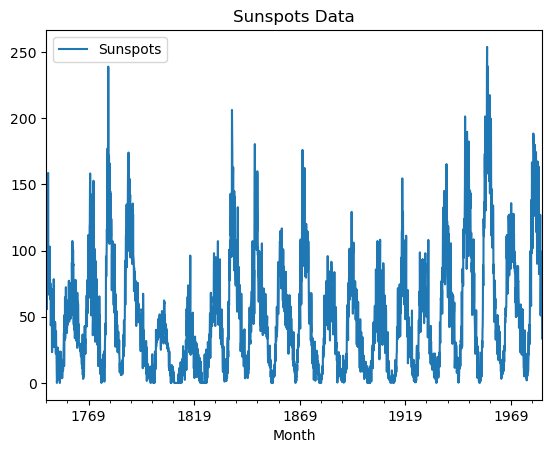

In [15]:
# Explore the sunspots dataset
print("Sunspots Dataset:")
print(sunspots_df.head())
print(sunspots_df.info())
print(sunspots_df.describe())
sunspots_df.plot(x='Month', y='Sunspots', title='Sunspots Data')
plt.show()

In [18]:
# Apply forecasting algorithms to the temperature dataset
ar_temp_model = AutoReg(temp_df['Temp'], lags=5)  # Example lag
ar_temp_model_fit = ar_temp_model.fit()
print("AutoReg Temperature Model:")
print(ar_temp_model_fit.summary())

sarimax_temp_model = SARIMAX(temp_df['Temp'], order=(5, 1, 2), seasonal_order=(1, 1, 1, 12))  # Example SARIMA order
sarimax_temp_model_fit = sarimax_temp_model.fit()
print("SARIMAX Temperature Model:")
print(sarimax_temp_model_fit.summary())

AutoReg Temperature Model:
                            AutoReg Model Results                             
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                     AutoReg(5)   Log Likelihood               -8464.393
Method:               Conditional MLE   S.D. of innovations              2.468
Date:                Mon, 28 Aug 2023   AIC                          16942.787
Time:                        10:38:39   BIC                          16986.195
Sample:                             5   HQIC                         16958.247
                                 3650                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3931      0.137     10.146      0.000       1.124       1.662
Temp.L1        0.6518      0.016     39.691      0.000       0.620       0.684
Temp.L2       -0.0619    

D:\Development\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX Temperature Model:
                                      SARIMAX Results                                       
Dep. Variable:                                 Temp   No. Observations:                 3650
Model:             SARIMAX(5, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -8395.859
Date:                              Mon, 28 Aug 2023   AIC                          16811.718
Time:                                      10:39:09   BIC                          16873.707
Sample:                                           0   HQIC                         16833.798
                                             - 3650                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3915      0.395     -0.991      0.322      -1.166     

In [17]:
# Apply forecasting algorithms to the sunspots dataset
ar_sunspots_model = AutoReg(sunspots_df['Sunspots'], lags=5)  # Example lag
ar_sunspots_model_fit = ar_sunspots_model.fit()
print("AutoReg Sunspots Model:")
print(ar_sunspots_model_fit.summary())

sarimax_sunspots_model = SARIMAX(sunspots_df['Sunspots'], order=(5, 1, 2), seasonal_order=(1, 1, 1, 12))  # Example SARIMA order
sarimax_sunspots_model_fit = sarimax_sunspots_model.fit()
print("SARIMAX Sunspots Model:")
print(sarimax_sunspots_model_fit.summary())

AutoReg Sunspots Model:
                            AutoReg Model Results                             
Dep. Variable:               Sunspots   No. Observations:                 2820
Model:                     AutoReg(5)   Log Likelihood              -11753.970
Method:               Conditional MLE   S.D. of innovations             15.745
Date:                Mon, 28 Aug 2023   AIC                          23521.940
Time:                        10:38:19   BIC                          23563.539
Sample:                             5   HQIC                         23536.952
                                 2820                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8949      0.471      4.024      0.000       0.972       2.818
Sunspots.L1     0.5854      0.019     31.138      0.000       0.549       0.622
Sunspots.L2     0.1187  